<h1> Empirical estimation of IPMs (integral probability metrics)<span class="tocSkip"></span></h1>

Author: [Sylvain Combettes](https://github.com/sylvaincom).

Last update: Feb 2, 2020.

GitHub repository: [here](https://github.com/sylvaincom/comparison-distributions).

---
This notebook deals with the empirical estimation of IPMs (integral probability metrics) and completes my report on the _Comparison of Empirical Probability Distributions_. As $f$-divergences input probability distributions, IPMs input samples drawn from the probability distributions. Actually, for IPMs, we only focus on the Kantorovich metric.

If needed, please take a look at `ipm-prerequisite.ipynb` which introduces the `PuLP` library for solving linear programming problems and gives more details about how our function for computing the Kantorovich metric was built.

<br/>

<div class="alert alert-info"><h4>README<span class="tocSkip"></span></h4>
<p> We recommend reading the report before reading this notebook, as most explanations are not duplicated here.</p>

<p>
The best way to open this Jupyter Notebook is to use the table of contents from the extensions called <code>nbextensions</code>. See <a href="https://towardsdatascience.com/4-awesome-tips-for-enhancing-jupyter-notebooks-4d8905f926c5">4 Awesome Tips for Enhancing Jupyter Notebooks</a> by George Seif.
</p>

<p>
In your current directory:
<ul>
  <li>create a <code>img</code> folder (in which the generated images will be saved)</li>
  <li>create another <code>data</code> folder in move the download the <a href="https://github.com/sylvaincom/comparison-distributions/tree/master/data">data from my GitHub</a> into it</li>
</ul>
</p>

<p>
The Python version is 3.7.3.
</p>
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Defining-a-generic-function-for-computing-the-estimate-of-the-Kantorovich-metric-$W$" data-toc-modified-id="Defining-a-generic-function-for-computing-the-estimate-of-the-Kantorovich-metric-$W$-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Defining a generic function for computing the estimate of the Kantorovich metric $W$</a></span><ul class="toc-item"><li><span><a href="#Defining-the-generic-function" data-toc-modified-id="Defining-the-generic-function-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Defining the generic function</a></span></li><li><span><a href="#The-memory-error-due-to-the-linear-programming-problem" data-toc-modified-id="The-memory-error-due-to-the-linear-programming-problem-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>The memory error due to the linear programming problem</a></span></li></ul></li><li><span><a href="#Running-several-simulations-to-interpret-$W$" data-toc-modified-id="Running-several-simulations-to-interpret-$W$-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Running several simulations to interpret $W$</a></span><ul class="toc-item"><li><span><a href="#Comparing-two-normal-distributions" data-toc-modified-id="Comparing-two-normal-distributions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Comparing two normal distributions</a></span><ul class="toc-item"><li><span><a href="#Influence-of-the-difference-of-means-$\mu_q-\mu_p$-on-$W$" data-toc-modified-id="Influence-of-the-difference-of-means-$\mu_q-\mu_p$-on-$W$-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Influence of the difference of means $\mu_q-\mu_p$ on $W$</a></span></li><li><span><a href="#Influence-of-the-difference-of-standard-deviations-$\sigma_q-\sigma_p$-on-$W$" data-toc-modified-id="Influence-of-the-difference-of-standard-deviations-$\sigma_q-\sigma_p$-on-$W$-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Influence of the difference of standard deviations $\sigma_q-\sigma_p$ on $W$</a></span></li><li><span><a href="#Influence-of-the-number-of-samples-on-$W$" data-toc-modified-id="Influence-of-the-number-of-samples-on-$W$-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Influence of the number of samples on $W$</a></span></li></ul></li><li><span><a href="#Comparison-of-two-exponential-distributions" data-toc-modified-id="Comparison-of-two-exponential-distributions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Comparison of two exponential distributions</a></span></li><li><span><a href="#Comparison-of-two-uniform-distributions" data-toc-modified-id="Comparison-of-two-uniform-distributions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Comparison of two uniform distributions</a></span></li></ul></li><li><span><a href="#Application-of-the-Kantorovich-metric-to-the-data-generated-from-two-methods-for-computing-the-Choquet-integral" data-toc-modified-id="Application-of-the-Kantorovich-metric-to-the-data-generated-from-two-methods-for-computing-the-Choquet-integral-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Application of the Kantorovich metric to the data generated from two methods for computing the Choquet integral</a></span><ul class="toc-item"><li><span><a href="#For-the-Choquet-integral-of-normal-distributions" data-toc-modified-id="For-the-Choquet-integral-of-normal-distributions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>For the Choquet integral of normal distributions</a></span><ul class="toc-item"><li><span><a href="#Presenting-the-data" data-toc-modified-id="Presenting-the-data-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Presenting the data</a></span></li><li><span><a href="#Computing-the-Kantorovich-metric" data-toc-modified-id="Computing-the-Kantorovich-metric-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Computing the Kantorovich metric</a></span></li></ul></li><li><span><a href="#For-the-Choquet-integral-of-exponential-distributions" data-toc-modified-id="For-the-Choquet-integral-of-exponential-distributions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>For the Choquet integral of exponential distributions</a></span><ul class="toc-item"><li><span><a href="#Presenting-the-data" data-toc-modified-id="Presenting-the-data-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Presenting the data</a></span></li><li><span><a href="#Computing-the-Kantorovich-metric" data-toc-modified-id="Computing-the-Kantorovich-metric-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Computing the Kantorovich metric</a></span></li></ul></li></ul></li></ul></div>

<h2> Imports<span class="tocSkip"></span></h2>

In [1]:
# pip install pulp
from pulp import *

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

from time import process_time
import datetime

import random

We configure the size of the plots:

In [2]:
plt.rcParams["figure.figsize"] = (8,6)

# Defining a generic function for computing the estimate of the Kantorovich metric $W$

## Defining the generic function

We duplicate the functions created in `ipm-prerequisite.ipynb`:

In [3]:
def construct_c(X_p, X_q):
    m = len(X_p)
    n = len(X_q)
    
    Y = [1/m]*m + [-1/n]*n
    
    return np.asarray(Y)


def rho(x,y):
    return abs(x-y)


def construct_b(X_p, X_q):
    
    X = np.concatenate((X_p, X_q), axis=0)
    N = len(X)
    
    b_part = []
    for i in range(N):
        for j in range(i+1, N):
            b_part.append(rho(X[i], X[j]))
    
    # Now, we duplicate each row to obtain a list of size 2*N
    b = []
    for i in range(N):
        b.append(b_part[i])
        b.append(b_part[i])
    
    return b


def construct_M(X_p, X_q):
    
    X = np.concatenate((X_p, X_q), axis=0)
    N = len(X)
    
    M = []
    for i in range(N):
        for j in range(i+1, N):
            l_M_1 = [0]*N
            l_M_1[i] = 1
            l_M_1[j] = -1
            M.append(l_M_1)
            l_M_2 = [0]*N
            l_M_2[i] = -1
            l_M_2[j] = 1
            M.append(l_M_2)
    M = np.asarray(M)

    return M.astype(int)

and we regroup them under one function:

In [4]:
def kantorovich_metric(X_p, X_q):
    
    X = np.concatenate((X_p, X_q), axis=0)
    m = len(X_p)
    n = len(X_q)
    N = m+n
    
    c = construct_c(X_p, X_q)
    b = construct_b(X_p, X_q)
    M = construct_M(X_p, X_q)
    
    prob = LpProblem("LP problem for estimating the Kantorovich metric", LpMaximize)
    a = LpVariable.matrix("a", list(range(N)))
    prob += lpDot(c, a)
    p = 2*N
    for i in range(p):
        prob += lpDot(M[i], a) <= b[i]
    prob.solve()
    
#     for v in prob.variables():
#         print(v.name, "=", v.varValue)
        
#     print("objective=", value(prob.objective))

    return value(prob.objective)

Now, we check if we obtain the same result as formula (II.11) of the report:

In [5]:
np.random.seed(1) # random seed for reproducability
X_p = np.random.uniform(1, 2, 10)
np.random.seed(2) # random seed for reproducability
X_q = np.random.uniform(9, 10, 10)
W = kantorovich_metric(X_p, X_q)
print('The empirical Kantorovich metric is: \n', round(W, 3))

The empirical Kantorovich metric is: 
 8.129


which is close to $8$.

## The memory error due to the linear programming problem

We take the same parameters as previsouly but with more samples:

In [6]:
t_start = process_time()
np.random.seed(1) # random seed for reproducability
X_p = np.random.uniform(1, 2, 100)
np.random.seed(2) # random seed for reproducability
X_q = np.random.uniform(9, 10, 100)
kantorovich_metric(X_p, X_q)
t_stop = process_time()
print('The empirical Kantorovich metric is: \n', W)
print('The processing time is: \n', datetime.timedelta(seconds=t_stop-t_start))

The empirical Kantorovich metric is: 
 8.1291911711
The processing time is: 
 0:00:02.643628


In [7]:
t_start = process_time()
np.random.seed(1) # random seed for reproducability
X_p = np.random.uniform(1, 2, 200)
np.random.seed(2) # random seed for reproducability
X_q = np.random.uniform(9, 10, 200)
W = kantorovich_metric(X_p, X_q)
t_stop = process_time()
print('The empirical Kantorovich metric is: \n', W)
print('The processing time is: \n', datetime.timedelta(seconds=t_stop-t_start))

The empirical Kantorovich metric is: 
 8.325250933285504
The processing time is: 
 0:00:15.403067


In [8]:
# t_start = process_time()
# np.random.seed(1) # random seed for reproducability
# X_p = np.random.uniform(1, 2, 300)
# np.random.seed(2) # random seed for reproducability
# X_q = np.random.uniform(9, 10, 300)
# W = kantorovich_metric(X_p, X_q)
# t_stop = process_time()
# print('The empirical Kantorovich metric is: \n', W)
# print('The processing time is: \n', datetime.timedelta(seconds=t_stop-t_start))

We obtained a memory error for $300$ samples per distribution !

The problem is that when we have more than $400$ total samples (for the two distributions), $M$ already has $400 \times 399 \times 400 = 63~840~000$ values and we have a memory problem if we go above $400$ total samples. Hence, we can not have more than $200$ samples per distribution.

Note that the problem is not really about the computing time (which of course, we could have tried to improve).

# Running several simulations to interpret $W$

## Comparing two normal distributions

Here we consider two normal distributions $\mathbb{P} = \mathcal{N}(\mu_p, \sigma_p)$ and $\mathbb{Q} = \mathcal{N}(\mu_q, \sigma_q)$.

### Influence of the difference of means $\mu_q-\mu_p$ on $W$

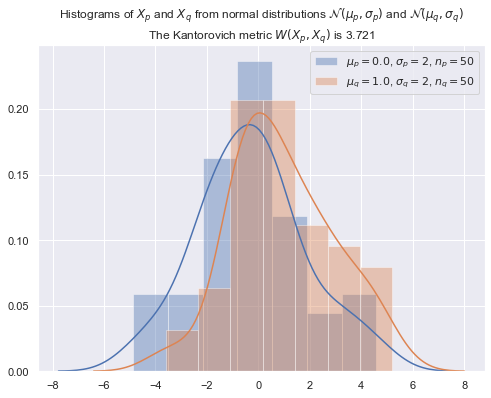

In [9]:
mu_p, sigma_p, n_p, mu_q, sigma_q, n_q = 0, 2, 50, 1, 2, 50
np.random.seed(2) # random seed for reproducability
X_p = np.random.normal(mu_p, sigma_p, n_p)
np.random.seed(1) # random seed for reproducability
X_q = np.random.normal(mu_q, sigma_q, n_q)

txt = 'Histograms of $X_p$ and $X_q$ from normal distributions '
txt = txt + '$\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'The Kantorovich metric $W(X_p, X_q)$ is %1.3f' % kantorovich_metric(X_p, X_q)
plt.title(txt)
sns.distplot(X_p) ;
sns.distplot(X_q) ;
txt1 = '$\mu_p = %1.1f$, $\sigma_p = %1.0f$, $n_p= %1.0f$' % (mu_p, sigma_p, n_p)
txt2 = '$\mu_q = %1.1f$, $\sigma_q = %1.0f$, $n_q= %1.0f$' % (mu_q, sigma_q, n_q)
plt.legend([txt1, txt2]) ;
plt.savefig('img/IPM_normal_histo_1.png', dpi=120) ; # to save the figure

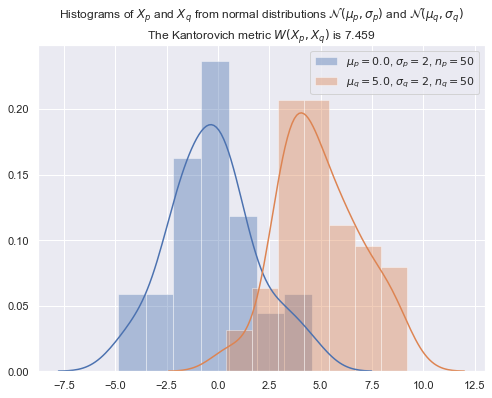

In [10]:
mu_p, sigma_p, n_p, mu_q, sigma_q, n_q = 0, 2, 50, 5, 2, 50
np.random.seed(2) # random seed for reproducability
X_p = np.random.normal(mu_p, sigma_p, n_p)
np.random.seed(1) # random seed for reproducability
X_q = np.random.normal(mu_q, sigma_q, n_q)

txt = 'Histograms of $X_p$ and $X_q$ from normal distributions '
txt = txt + '$\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'The Kantorovich metric $W(X_p, X_q)$ is %1.3f' % kantorovich_metric(X_p, X_q)
plt.title(txt)
sns.distplot(X_p) ;
sns.distplot(X_q) ;
txt1 = '$\mu_p = %1.1f$, $\sigma_p = %1.0f$, $n_p= %1.0f$' % (mu_p, sigma_p, n_p)
txt2 = '$\mu_q = %1.1f$, $\sigma_q = %1.0f$, $n_q= %1.0f$' % (mu_q, sigma_q, n_q)
plt.legend([txt1, txt2]) ;
plt.savefig('img/IPM_normal_histo_2.png', dpi=120) ; # to save the figure

In [11]:
l_IPM_mu = []
l_diff_mu = []

mu_p = -5
sigma_p = 2
n_p = 30 # after several simulations, 30 seems enough
np.random.seed(1) # random seed for reproducability
X_p = np.random.normal(mu_p, sigma_p, n_p)

sigma_q = 2
n_q = n_p

l_abs = np.arange(0, 20+0.5, 0.5)
for mu_q in l_abs:
    np.random.seed(int(mu_q*10)) # random seed for reproducability, different each time
    X_q = np.random.normal(mu_q, sigma_q, n_q)
    l_diff_mu.append([mu_q-mu_p])
    l_IPM_mu.append([kantorovich_metric(X_p, X_q)])

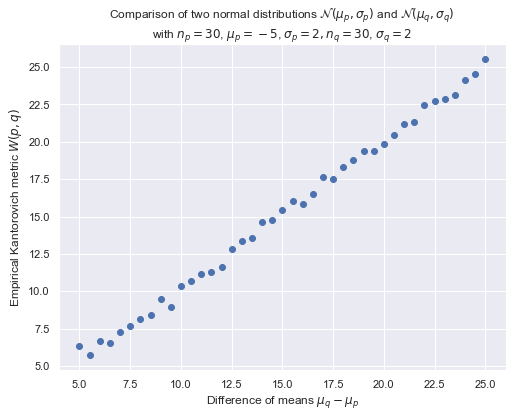

In [12]:
txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $n_p = %1.0f$, $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (n_p, mu_p, sigma_p)
txt = txt + '$n_q = %1.0f$, $\sigma_q = %1.0f$' % (n_q, sigma_q)
plt.title(txt)
plt.xlabel('Difference of means $\mu_q-\mu_p$')
plt.ylabel('Empirical Kantorovich metric $W(p, q)$')
plt.plot(l_diff_mu, l_IPM_mu, 'o') ;
plt.savefig('img/IPM_normal_diff_mu.png', dpi=120) # to save the figure

Can we say that the dependency of $W(p,q)$ to $\mu_q-\mu_p$ is linear? Yes. Indeed, we have:

In [13]:
reg = LinearRegression()
X = np.power(np.asarray(l_diff_mu), 1)
y = np.asarray(l_IPM_mu)

reg.fit(X, y)
print('The regression score is: \n', round(reg.score(X, y), 3))
print('The regression coefficients are: \n', np.round(reg.coef_, 3))
print('The regression intercept is: \n', np.round(reg.intercept_, 3))

The regression score is: 
 0.997
The regression coefficients are: 
 [[0.987]]
The regression intercept is: 
 [0.379]


We used the the linear regression function from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and the [score method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) returns the coefficient of determination `R^2` of the prediction. The coefficient `R^2` is defined as `(1 - u/v)`, where $u$ is the residual sum of squares `((y_true - y_pred) ** 2).sum()` and `v` is the total sum of squares `((y_true - y_true.mean()) ** 2).sum()`. The best possible score is $1.0$ and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of `y`, disregarding the input features, would get a `R^2` score of `0.0`.

Now we do the same as previously, but by changing the fixed values:

The regression score is: 
 0.249
The regression coefficients are: 
 [[0.012]]
The regression intercept is: 
 [11.642]


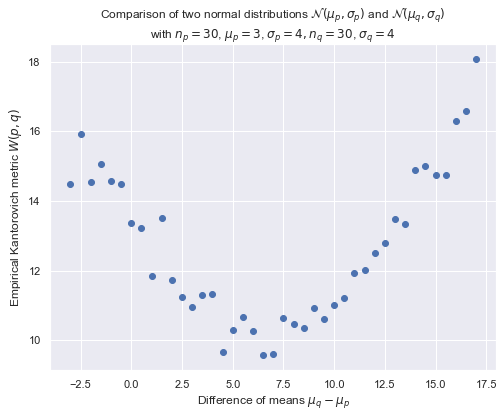

In [14]:
l_IPM_mu = []
l_diff_mu = []

mu_p = 3
sigma_p = 4
n_p = 30 # after several simulations, 30 seems enough
np.random.seed(1) # random seed for reproducability
X_p = np.random.normal(mu_p, sigma_p, n_p)

sigma_q = 4
n_q = n_p

l_abs = np.arange(0, 20+0.5, 0.5)
for mu_q in l_abs:
    np.random.seed(int(mu_q*10)) # random seed for reproducability, different each time
    X_q = np.random.normal(mu_q, sigma_q, n_q)
    l_diff_mu.append([mu_q-mu_p])
    l_IPM_mu.append([kantorovich_metric(X_p, X_q)])


txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $n_p = %1.0f$, $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (n_p, mu_p, sigma_p)
txt = txt + '$n_q = %1.0f$, $\sigma_q = %1.0f$' % (n_q, sigma_q)
plt.title(txt)
plt.xlabel('Difference of means $\mu_q-\mu_p$')
plt.ylabel('Empirical Kantorovich metric $W(p, q)$')
plt.plot(l_diff_mu, l_IPM_mu, 'o') ;
plt.savefig('img/IPM_normal_diff_mu_2.png', dpi=120) # to save the figure


reg = LinearRegression()
X = np.power(np.asarray(l_diff_mu), 2)
y = np.asarray(l_IPM_mu)

reg.fit(X, y)
print('The regression score is: \n', round(reg.score(X, y), 3))
print('The regression coefficients are: \n', np.round(reg.coef_, 3))
print('The regression intercept is: \n', np.round(reg.intercept_, 3))

### Influence of the difference of standard deviations $\sigma_q-\sigma_p$ on $W$

The regression score is: 
 0.856
The regression coefficients are: 
 [[0.573]]
The regression intercept is: 
 [6.891]


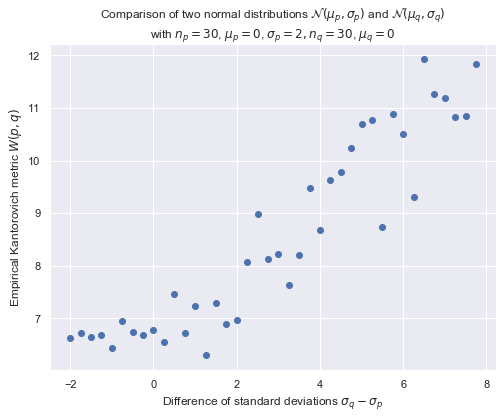

In [15]:
l_IPM_sigma = []
l_diff_sigma = []

mu_p = 0
sigma_p = 2
n_p = 30 # after several simulations, 30 seems enough
np.random.seed(1) # random seed for reproducability
X_p = np.random.normal(mu_p, sigma_p, n_p)

mu_q = 0
n_q = n_p

l_abs = np.arange(0, 10, 0.25)
for sigma_q in l_abs:
    np.random.seed(int(sigma_q*10)) # random seed for reproducability, different each time
    X_q = np.random.normal(mu_q, sigma_q, n_q)
    l_diff_sigma.append([sigma_q-sigma_p])
    l_IPM_sigma.append([kantorovich_metric(X_p, X_q)])

txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $n_p = %1.0f$, $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (n_p, mu_p, sigma_p)
txt = txt + '$n_q = %1.0f$, $\mu_q = %1.0f$' % (n_q, mu_q)
plt.title(txt)
plt.xlabel('Difference of standard deviations $\sigma_q-\sigma_p$')
plt.ylabel('Empirical Kantorovich metric $W(p, q)$')
plt.plot(l_diff_sigma, l_IPM_sigma, 'o') ;
plt.savefig('img/IPM_normal_diff_sigma.png', dpi=120) # to save the figure

reg = LinearRegression()
X = np.power(np.asarray(l_diff_sigma), 1)
y = np.asarray(l_IPM_sigma)

reg.fit(X, y)
print('The regression score is: \n', round(reg.score(X, y), 3))
print('The regression coefficients are: \n', np.round(reg.coef_, 3))
print('The regression intercept is: \n', np.round(reg.intercept_, 3))

### Influence of the number of samples on $W$

For $n_p=n_q=10$:

The regression score is: 
 0.991
The regression coefficients are: 
 [[1.021]]
The regression intercept is: 
 [-0.048]


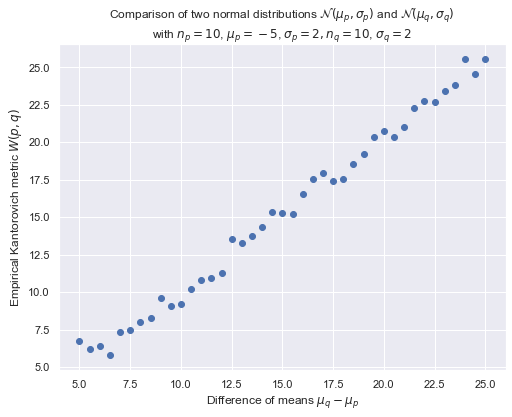

In [16]:
l_IPM_mu = []
l_diff_mu = []

mu_p = -5
sigma_p = 2
n_p = 10 # after several simulations, 30 seems enough
np.random.seed(1) # random seed for reproducability
X_p = np.random.normal(mu_p, sigma_p, n_p)

sigma_q = 2
n_q = n_p

l_abs = np.arange(0, 20+0.5, 0.5)
for mu_q in l_abs:
    np.random.seed(int(mu_q*10)) # random seed for reproducability, different each time
    X_q = np.random.normal(mu_q, sigma_q, n_q)
    l_diff_mu.append([mu_q-mu_p])
    l_IPM_mu.append([kantorovich_metric(X_p, X_q)])


txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $n_p = %1.0f$, $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (n_p, mu_p, sigma_p)
txt = txt + '$n_q = %1.0f$, $\sigma_q = %1.0f$' % (n_q, sigma_q)
plt.title(txt)
plt.xlabel('Difference of means $\mu_q-\mu_p$')
plt.ylabel('Empirical Kantorovich metric $W(p, q)$')
plt.plot(l_diff_mu, l_IPM_mu, 'o') ;
plt.savefig('img/IPM_normal_diff_n.png', dpi=120) # to save the figure


reg = LinearRegression()
X = np.power(np.asarray(l_diff_mu), 1)
y = np.asarray(l_IPM_mu)

reg.fit(X, y)
print('The regression score is: \n', round(reg.score(X, y), 3))
print('The regression coefficients are: \n', np.round(reg.coef_, 3))
print('The regression intercept is: \n', np.round(reg.intercept_, 3))

For $n_p=n_q=50$:

The regression score is: 
 0.998
The regression coefficients are: 
 [[0.994]]
The regression intercept is: 
 [0.228]


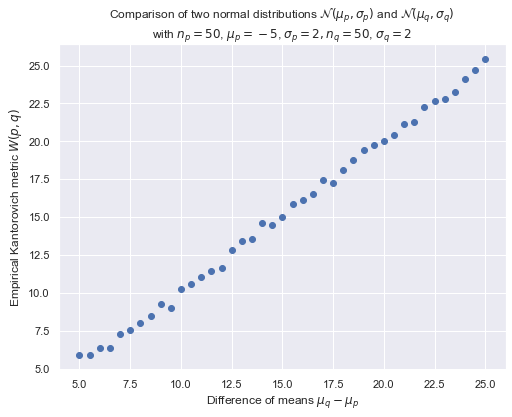

In [17]:
l_IPM_mu = []
l_diff_mu = []

mu_p = -5
sigma_p = 2
n_p = 50 # after several simulations, 30 seems enough
np.random.seed(1) # random seed for reproducability
X_p = np.random.normal(mu_p, sigma_p, n_p)

sigma_q = 2
n_q = n_p

l_abs = np.arange(0, 20+0.5, 0.5)
for mu_q in l_abs:
    np.random.seed(int(mu_q*10)) # random seed for reproducability, different each time
    X_q = np.random.normal(mu_q, sigma_q, n_q)
    l_diff_mu.append([mu_q-mu_p])
    l_IPM_mu.append([kantorovich_metric(X_p, X_q)])


txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $n_p = %1.0f$, $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (n_p, mu_p, sigma_p)
txt = txt + '$n_q = %1.0f$, $\sigma_q = %1.0f$' % (n_q, sigma_q)
plt.title(txt)
plt.xlabel('Difference of means $\mu_q-\mu_p$')
plt.ylabel('Empirical Kantorovich metric $W(p, q)$')
plt.plot(l_diff_mu, l_IPM_mu, 'o') ;
plt.savefig('img/IPM_normal_diff_n_2.png', dpi=120) # to save the figure


reg = LinearRegression()
X = np.power(np.asarray(l_diff_mu), 1)
y = np.asarray(l_IPM_mu)

reg.fit(X, y)
print('The regression score is: \n', round(reg.score(X, y), 3))
print('The regression coefficients are: \n', np.round(reg.coef_, 3))
print('The regression intercept is: \n', np.round(reg.intercept_, 3))

## Comparison of two exponential distributions


Here we consider two exponential distributions $\mathbb{P} = \mathcal{E}(\lambda_p)$ and $\mathbb{Q} = \mathcal{E}(\lambda_q)$.

In [18]:
l_IPM_lambda = []
l_diff_lambda = []

lambda_p = 1
n_p = 30 # after several simulations, 30 seems enough
np.random.seed(1) # random seed for reproducability
X_p = np.random.exponential(lambda_p, n_p)

n_q = n_p

l_abs = np.arange(1, 20, 0.5)
for lambda_q in l_abs:
    np.random.seed(int(lambda_q*10)) # random seed for reproducability, different each time
    X_q = np.random.exponential(lambda_q, n_q)
    l_diff_lambda.append([lambda_q-lambda_p])
    l_IPM_lambda.append([kantorovich_metric(X_p, X_q)])

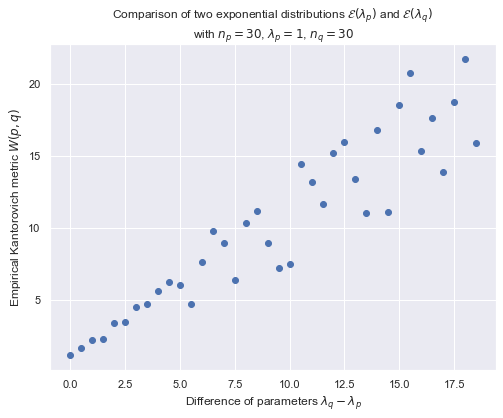

In [19]:
txt = 'Comparison of two exponential distributions $\mathcal{E}(\lambda_p)$ and $\mathcal{E}(\lambda_q)$ \n'
txt = txt + 'with $n_p = %1.0f$, $\lambda_p = %1.0f$, ' % (n_p, lambda_p)
txt = txt + '$n_q = %1.0f$' % (n_q)
plt.title(txt)
plt.xlabel('Difference of parameters $\lambda_q-\lambda_p$')
plt.ylabel('Empirical Kantorovich metric $W(p, q)$')
plt.plot(l_diff_lambda, l_IPM_lambda, 'o') ;
plt.savefig('img/IPM_exponential_diff.png', dpi=120) # to save the figure

In [20]:
reg = LinearRegression()
X = np.power(np.asarray(l_diff_lambda), 1)
y = np.asarray(l_IPM_lambda)

reg.fit(X, y)
print('The regression score is: \n', round(reg.score(X, y), 3))
print('The regression coefficients are: \n', np.round(reg.coef_, 3))
print('The regression intercept is: \n', np.round(reg.intercept_, 3))

The regression score is: 
 0.865
The regression coefficients are: 
 [[0.957]]
The regression intercept is: 
 [1.402]


## Comparison of two uniform distributions

Here we consider two normal distributions $\mathbb{P} = \mathbb{U}\left([a, a+h]\right)$ and $\mathbb{Q} = \mathbb{U}\left([r, r+h]\right)$ where $h$ is the length of the intervals.

Note: $a$ is called the **interval start** of $[a, a+h]$.

In [21]:
l_IPM_unif = []
l_diff_unif = []

h = 2 # length of the intervals
a = 0
b = a+h
n_p = 30 # after several simulations, 30 seems enough
np.random.seed(1) # random seed for reproducability
X_p = np.random.uniform(a, b, n_p)

n_q = n_p

l_abs = np.arange(0, 20, 0.5)
for r in l_abs:
    np.random.seed(int(r*10)) # random seed for reproducability, different each time
    X_q = np.random.uniform(r, r+h, n_q)
    l_diff_unif.append([r-a])
    l_IPM_unif.append([kantorovich_metric(X_p, X_q)])

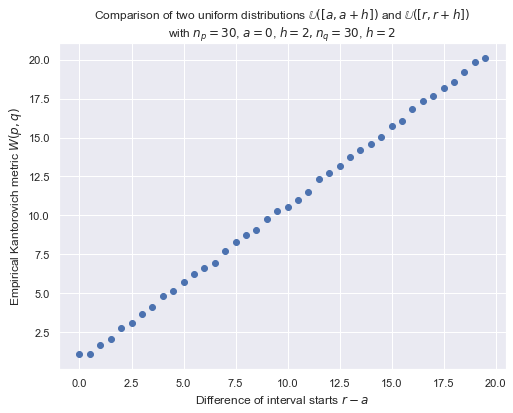

In [22]:
txt = 'Comparison of two uniform distributions $\mathbb{U}([a, a+h])$ and $\mathbb{U}([r, r+h])$ \n'
txt = txt + 'with $n_p = %1.0f$, $a = %1.0f$, $h = %1.0f, $' % (n_p, a, h)
txt = txt + '$n_q = %1.0f$, $h = %1.0f$' % (n_q, h)
plt.title(txt)
plt.xlabel('Difference of interval starts $r-a$')
plt.ylabel('Empirical Kantorovich metric $W(p, q)$')
plt.plot(l_diff_unif, l_IPM_unif, 'o') ;
plt.savefig('img/IPM_uniform_diff.png', dpi=120) # to save the figure

In [23]:
reg = LinearRegression()
X = np.power(np.asarray(l_diff_unif), 1)
y = np.asarray(l_IPM_unif)

reg.fit(X, y)
print('The regression score is: \n', round(reg.score(X, y), 3))
print('The regression coefficients are: \n', np.round(reg.coef_, 3))
print('The regression intercept is: \n', np.round(reg.intercept_, 3))

The regression score is: 
 1.0
The regression coefficients are: 
 [[0.998]]
The regression intercept is: 
 [0.693]


# Application of the Kantorovich metric to the data generated from two methods for computing the Choquet integral

## For the Choquet integral of normal distributions

### Presenting the data

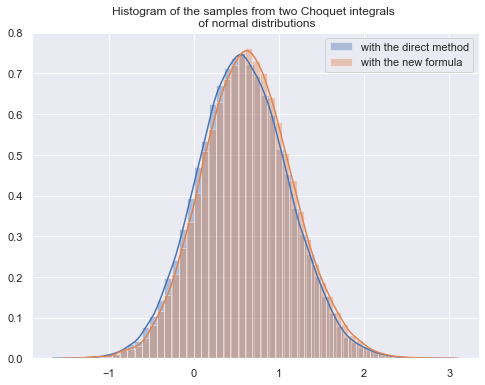

In [24]:
Xp_df = pd.read_csv('data/X1_normal.csv', sep=',', header=None)
Xq_df = pd.read_csv('data/X2_normal.csv', sep=',', header=None)

Xp_list = Xp_df.values.tolist()
Xq_list = Xq_df.values.tolist()

sns.distplot(Xp_list) ;
sns.distplot(Xq_list) ;
plt.title('Histogram of the samples from two Choquet integrals \n of normal distributions') ;
plt.legend(['with the direct method', 'with the new formula']) ;
plt.savefig('img/choquet_normal_X.png', dpi=120) # to save the figure

Are `Xp` and `Xq` from normal distributions? We use the `scipy.stats.normaltest` function [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) which tests the null hypothesis that a sample comes from a normal distribution.

In [25]:
alpha = 1e-3

k2, p = stats.normaltest(Xp_list)
print('The pvalue is: \n', p)

print('Null hypothesis: Xp comes from a normal distribution: Xp does not come from a normal distribution.')
if p < alpha:  
    print("The null hypothesis can be rejected.")
else:
    print("The null hypothesis cannot be rejected.")

The pvalue is: 
 [1.158583e-26]
Null hypothesis: Xp comes from a normal distribution: Xp does not come from a normal distribution.
The null hypothesis can be rejected.


In [26]:
alpha = 1e-3

k2, p = stats.normaltest(Xq_list)
print('The pvalue is: \n', p)

print('Null hypothesis: Xq comes from a normal distribution.')
if p < alpha:  
    print("The null hypothesis can be rejected: q does not come from a normal distribution.")
else:
    print("The null hypothesis cannot be rejected.")

The pvalue is: 
 [9.25336667e-29]
Null hypothesis: Xq comes from a normal distribution.
The null hypothesis can be rejected: q does not come from a normal distribution.


### Computing the Kantorovich metric

In [27]:
t_start = process_time()
l_IPM_choquet_normal = []

random.seed(1)
Xp = random.sample(Xp_list, 100)

for i in range(10, 20):
    random.seed(i)
    Xq = random.sample(Xq_list, 100)
    W = kantorovich_metric(Xp, Xq)
    l_IPM_choquet_normal.append(W)
t_stop = process_time()

print('The mean of the Kantorovich metrics is: \n', np.round(np.mean(l_IPM_choquet_normal), 3))
print('The standard deviation of the Kantorovich metrics is: \n', np.round(np.std(l_IPM_choquet_normal), 3))
print('The total processing time is: \n', datetime.timedelta(seconds=t_stop-t_start))

The mean of the Kantorovich metrics is: 
 0.894
The standard deviation of the Kantorovich metrics is: 
 0.033
The total processing time is: 
 0:00:20.838451


## For the Choquet integral of exponential distributions

### Presenting the data

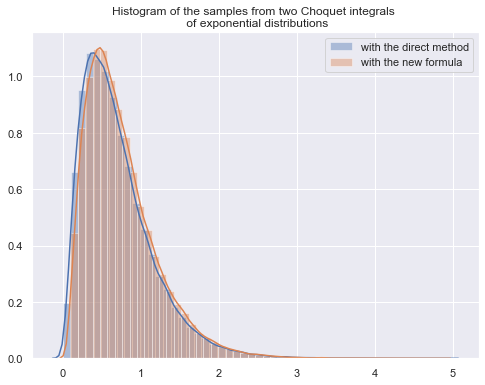

In [28]:
Xp_df = pd.read_csv('data/X1_exp.csv', sep=',', header=None)
Xq_df = pd.read_csv('data/X2_exp.csv', sep=',', header=None)

Xp_list = Xp_df.values.tolist()
Xq_list = Xq_df.values.tolist()

sns.distplot(Xp_list) ;
sns.distplot(Xq_list) ;
plt.title('Histogram of the samples from two Choquet integrals \n of exponential distributions') ;
plt.legend(['with the direct method', 'with the new formula']) ;
plt.savefig('img/choquet_exp_X.png', dpi=120) # to save the figure

### Computing the Kantorovich metric

In [29]:
t_start = process_time()
l_IPM_choquet_exp = []

random.seed(1)
Xp = random.sample(Xp_list, 100)

for i in range(10, 20):
    random.seed(i)
    Xq = random.sample(Xq_list, 100)
    W = kantorovich_metric(Xp, Xq)
    l_IPM_choquet_exp.append(W)
t_stop = process_time()

print('The mean of the Kantorovich metrics is: \n', np.round(np.mean(l_IPM_choquet_exp), 3))
print('The standard deviation of the Kantorovich metrics is: \n', np.round(np.std(l_IPM_choquet_exp), 3))
print('The total processing time is: \n', datetime.timedelta(seconds=t_stop-t_start))

The mean of the Kantorovich metrics is: 
 0.776
The standard deviation of the Kantorovich metrics is: 
 0.051
The total processing time is: 
 0:00:20.596699
